# Modeling Neutron Diffusion

In nuclear reactors, thermal neutrons are released from fuel elements. These fuel elements typically take the form of rods. Thermal neutrons fly around a moderator (the medium in the fuel engine), water, to bind with uranium, making them unstable so they split apart to release massive amounts of energy. When uranium splits apart, they release three more neutrons which can bind to even more uranium and make them unstable. While neutrons released from uranium are far less likely to bind to other uranium, they still contribute exponentially to the growing energy of a nuclear fuel tank.

Neutron diffusion is a staple of nuclear reactors. This project is but a step in the grand scheme of modeling nuclear reactors, as the only parts of the system we are including are the fuel elements, their thermal neutrons, the moderator and the nuclear fuel tank's shell. Specific to neutrons, we are modeling a neutron statistical distribution within a nuclear fuel moderator without interacting with each other or other moving particles.

Time permitting, we will be including control rods in our model, which is discussed later.

## Neutron Diffusion Research 

From https://www.nuclear-power.net/nuclear-power/reactor-physics/neutron-diffusion-theory/

# Fick's Law

Fick's Law describes $$ J = - D \frac{\delta \phi}{\delta x} $$
where $J$ is the diffusion flux, $D$ is diffusion coefficient for the particular medium (we are using a constant D), and $\phi$ is the concentration. For a Monte Carlo method, $\phi$ would be the sampling weighted distribution. 

We have yet to decide how many dimensions we want to work in, so in general, $$ \textbf{J} = - D \vec{\nabla} \phi $$

# The Continuity Equation

Leakage rate ($D \nabla^2 \phi$) - absorbtion rate ($\Sigma_a \phi$) + production rate ($S$) = rate of change ($\frac{1}{v} \frac{\partial \phi}{\partial t}$)

$$ D \nabla^2 \phi - \Sigma_a \phi + S = \frac{1}{v} \frac{\partial \phi}{\partial t} $$

Here, $\phi$ is the diffusing flux or concentration (it is the number of particles per area per time), $\Sigma_a$ is the macroscopic absorption cross-section, and $S$ is the rate at which neutrons are emitted from sources per volume.

## Steady State

We will solve for $\phi$ at steady state, so our equation becomes 
$$ D \nabla^2 \phi - \Sigma_a \phi +S(\vec{r},\infty)= 0 $$

Most reactions take place in heavy water ($D_2O$) or water ($H_2O$). For heavy water, $D$ = 0.84 cm and $\Sigma_a$ = 3.3e-5 /cm. For water $D$ = 0.142 cm and $\Sigma_a$ = 0.022 /cm.  We will be assuming that the Source term reach es steady state at specifc locations where we have placed the source.  For example in the cylindrical rod case, we will assume that the source will supply the same number of neutrons constantly along the entire length of the rod.  For multiple rods placed into the chamber, the same number of neutrons will be present along each of the rods which describes $S$.  $S$ will go to 0 everywhere there is not a source rod. 


### Known Solution in Cylindrical Solutions

The known solution for a cylindrical nuclear reactor with an infinitely long cylindrical uniform source term down the center is given by

$$ \phi (r) = \frac{S_0}{2 \pi D} K_0 \left( \frac{r}{L} \right) $$

where $L$ is the diffusion length. For heavy water $L$ is 160 cm, and for water $L$ is 2.54 cm. $K_0 \left( \frac{r}{L} \right)$ is a zeroth order bessel function of the second kind, and $S_0$ is the source strength.  We will model this by assuming the top maps to the bottom of the function and thus it appears to be infinite in extent for no weird edge effects in the solution.

Usually for thermal neutrons 

$$ L^2 = \frac{D}{\Sigma_a} $$

## Boundary Conditions

We will assume that the neutron density, $\phi$, goes to 0 at the edges of the container, and that the neutrons are all contained within the container, i.e. they cannot escape.

# Discretization

The Laplacian in Cartesian coordinates is 

$$ \nabla^2 \equiv \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2} $$

We can discretize our equation using center differencing if we define $x_i \equiv i \Delta x$, $y_j \equiv j \Delta y$, and $z_k \equiv k \Delta z$ and we get

$$ D \left( \frac{\phi_{i+1,j,k} - 2 \phi_{i,j,k} + \phi_{i-1,j,k} }{\Delta x^2} + \frac{\phi_{i,j+1,k} - 2 \phi_{i,j,k} + \phi_{i,j-1,k} }{\Delta y^2} + \frac{\phi_{i,j,k+1} - 2 \phi_{i,j,k} + \phi_{i,j,k-1} }{\Delta z^2} \right) - \Sigma_a \phi_{i,j,k} + S_{i,j,k} = 0 .$$

Because we have cylindrical symmetry we can define $\Delta x = \Delta y \equiv \Delta$. Thus our equation simplifies to

$$ D \left( \frac{\phi_{i+1,j,k} + \phi_{i,j+1,k} - 4 \phi_{i,j,k} + \phi_{i-1,j,k} + \phi_{i,j-1,k} }{\Delta^2} + \frac{\phi_{i,j,k+1} - 2 \phi_{i,j,k} + \phi_{i,j,k-1} }{\Delta z^2} \right) - \Sigma_a \phi_{i,j,k} + S_{i,j,k} = 0 .$$

We may decide to not use all dimensions since 3D Monte Carlo methods sound extremely slow without lots of optimizations.

## Interesting problems to solve

The analytic solution falls apart when multiple source terms are present in the reactor.  Modern reactors have multiple parallel source rods and are loaded into near the center of the unit.  Will this have any affect on the neutron density function further away from the sources?  Modern reactors also use cylinders.  Is there a reason for this other that they are easy to manufacture?  Why not use rectangular prisms?

Furthermore, modern reactors use control rods to slow the reaction down. In math terms they act like sinks, since they pull the diffusion down to zero at some points.  Will these greatly affect the neutron distribution in steady state?  Just like how we set the sources to a constant value, we can set a value for sinks to go to 0 at specific locations to see how the diffusion responds.

Also, the analytic solution assumes that the reactor is infinite in length and the source term is, too, infinite, so there are no weird effects from the top and bottom of the cylinder.  But we want to see what happens to the density when a strict top and bottom are enforced on the container.  We will enforce that the neutron density must also go to zero at the top and bottom edges since in our simulation the neutrons can't be inside of the nuclear reactor walls.  In reality, some neutrons probably escape into the chamber walls. But we feel this would be complicated to model since there would have to be a statistical model to randomly see if a neutron penetrates the walls of the container.

Finally, the analytic solution assumes a uniform source term.  What if there are defects in the rod and it is not uniform, say some Uranium atoms are not radioactive on the bar?  We could model this with a source function along the bar instead of having a constant value.

Most likely, we will not look at all of these interesting problems as this project should be short... and we want to start focusing on the final project.  However, we do plan to try and accomplish at least one of these in our Phase 3 document, and we may complete other tasks depending on time constraints.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import mpl_toolkits.mplot3d.axes3d as axes3d
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick', direction='in', top=True)
plt.rc('axes', labelsize=20) # axes labels
plt.rc('axes', titlesize=22) # axes title
plt.rc('legend', fontsize=15) # legend
plt.rc('figure', titlesize=26) # title
plt.rc('font', size=20) # default
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
rc('animation', html = 'jshtml')
import scipy.interpolate as interp
from IPython.display import HTML
import scipy.integrate as integ
#from playsound import playsound
import numpy.random as random
import scipy.optimize as opt
import scipy.special as sf
import scipy.linalg as la
import scipy.misc as ms
import numpy as np
%matplotlib inline
#import xlrd
import time
import math
import sys

We must plan to use Monte Carlo methods to solve this diffusion problem numerically.

# Algorithms

The equation we are attempting to model is

$$ D \nabla^2 \phi - \Sigma_a \phi + b S = \frac{1}{v} \frac{\partial \phi}{\partial t} $$

where S is normalized to have a max height of 1 and b describes the magnitude.  In steady state simplifies to

$$ D \nabla^2 \phi - \Sigma_a \phi +S(\vec{r},\infty)= 0. $$

As described in phase 1, the discretization is

$$ D \left( \frac{\phi_{i+1,j,k} + \phi_{i,j+1,k} - 4 \phi_{i,j,k} + \phi_{i-1,j,k} + \phi_{i,j-1,k} }{\Delta^2} + \frac{\phi_{i,j,k+1} - 2 \phi_{i,j,k} + \phi_{i,j,k-1} }{\Delta z^2} \right) - \Sigma_a \phi_{i,j,k} + S_{i,j,k} = 0$$

which in one dimension simplifies to

$$ D \left( \frac{ \phi_{i+1} - 2 \phi_{i} + \phi_{i-1} }{\Delta x^2}\right) - \Sigma_a \phi_{i} + S_{i} = 0.$$

Analytically we can solve this equation in 1D.  Lets define constants $A=\frac{\Sigma}{D}$ and $B=\frac{b}{D}$.  If we assume that S takes the form of $S=\delta(x-a)$ where $a$ is a displacement in x for the source term, we can reduce the original equation in 1D to the form
$$ \frac{\partial^2 \phi}{\partial x^2} - A \phi + B \delta(x-a) = 0 $$
where we can introduce the Fourier Transform
$$\tilde{\phi}(k)=\int^\infty_{-\infty}dx\space\phi(x)e^{-ikx}$$ 
and its inverse
$$\phi(x)=\frac{1}{2\pi}\int^\infty_{-\infty}dk\space\tilde{\phi}(k)e^{ikx}.$$
We can transform the 1D simplified equation by transforming it into frequency space to find that
$$-k^2\tilde{\phi}-A\tilde{\phi}+Be^{-ka}=0$$
where we can solve for $\tilde{\phi}$ to find the result
$$\tilde{\phi}=\frac{B e^{-ika}}{k^2+A}.$$
Transforming it back gives us
$$\phi(x)=\frac{1}{2\pi}\int^\infty_{-\infty}dk\space\frac{B e^{-ika}}{k^2+A}e^{ikx}$$
which reduces down to
$$\phi(x)=\frac{B}{2\pi A}\int^\infty_{-\infty}\left[dk\space \frac{e^{-ik(a-x)}}{\left(\frac{k}{\sqrt{A}}\right)^2+1}\right]$$
where we can transform $\frac{k}{\sqrt{A}}=\tan{t}$ where $\sqrt{A}\sec^2{t}\space dt=k\space dk$ and it reduces to
$$\phi(x)=\frac{B}{2\pi A}\int^{\frac{\pi}{2}}_{\frac{-\pi}{2}}dt\space e^{i\sqrt{A}\tan{(t)}(a-x)}$$
which has the solution
$$\phi(x)=\frac{B}{2\sqrt{A}}e^{-|\sqrt{A}(a-x)|}.$$
Returning back to our original parameters resolves the equation to 
$$\phi(x)=\frac{b}{2\sqrt{\Sigma D}}\exp\left(-\left|\sqrt{\frac{\Sigma}{D}}(a-x)\right|\right)$$
which is the solution to the 1D delta function source case.

We begin to implement a preliminary algorithm down below.  We have the analytic solution above to compare our answer to.  The idea behind our algorithm is very similar to the ideas we talked about in class about using the MC for solving differential equations.  We must choose a value to minimize the function with respect to similar to how we found the minimum energy of the quantum oscillator in class.  Here we are minimizing the equation
$$ D \left( \frac{ \phi_{i+1} - 2 \phi_{i} + \phi_{i-1} }{\Delta x^2}\right) - \Sigma_a \phi_{i} + b S_{i} = 0.$$
However, there is a small catch.  Since we will be assuming
$$S_i=\begin{cases} 
      0 & x\ne a \\
      1 & x=a
   \end{cases}
$$
there will be a discontinuity in the first and second derivatives at $x=a$.  You can also notice this from the analytic solution. The same problem will persist through all of our tests as long as we continue the use of a delta function spike to approximate $S$.  This means our minimizer cannot be evaluated when $x=a$ since the second derivative is numerical nonsense.  We implemented this very inefficiently down below in the function "calc_cont_eqn_1d" since we solve for the first half before the discontinuity and then the second half after the discontinuity.  This function could be even be better optimized beyond issues previously brought up, since we sum all the values each time we iterate through our algorithm. This is a waste of time because only one location will change at a time.

The actual algorithm is quite simple.  First it needs an appropriate guess with proper boundary conditions and with all the physical parameters derived.  We will talk about this later.  Then the actual algorithm can act on the initial guess.  Our algorithm first computes a random integer from 1 to $J-1$ where $J$ is number of x values in our input array.  This random integer selects the random index that will be iterated in the algorithm.  Now we save the random index value to a temporary variable to access later.  Next, we generate another random number this time on the normal distribution from 0 to 1.  We multiply the distribution by 2 and subtract 1 to have an equal probability of generating a number from $(-1,1)$.  We multiply this random number by a predetermined scale factor.  This scale factor will determine how fast both our algorithm converges, but also how much errors the algorithm will have.  We add this random scaled number to the number before the operation happened at the index.  Then we run this new array through the minimizer as defined above to see if the minimum value has decreased.  If it decreases, it is good and we iterate again.  If the minimum value does not decrease then we replace the changed index value with the old value and repeat.  

We created a fail-safe in case we never converge, preventing us from being stuck in an infinite loop.  If after 1000 random number generations there has been no good changes, we change the iterations by one.  This is not necessarily the best way to accomplish this since we can get stuck running for a very long time without convergence.  Really we should implement after so many failed attempts for the division factor multiplying the random generated number to decrease.  Thus, there would be a finer resolution to solve on and make it easier to find a converging solution faster.

We have already experienced a few issues with this implementation.  The largest issue is getting a convergent correct solution.  Discretizing the derivatives is beneficial since it makes the difference equation simple.  The following issue is something that we have mentioned repeatedly in class before: discretizing the equations changes the problems being solved.  The discretized problem has many more solutions than the only correct analytic one.  This is since the random numbers are allowed to fluctuate randomly anywhere in the solution and give temporary discontinuities.  These discontinuities can sway the value of the second derivative and make the problem think it is minimized when it is ultimately not.  One way we have discussed and started playing with is implementing a form of the multigrid method from BVP problems.  The idea is quite simple: solve the equation on a coarse grid and then make it finer and finer and force it to get a solution.  This has 2 advantages.

1. By solving on a finer grid we are making our solution better.  The solution will likely oscillate incorrectly less as we start to approach approximating an analytic expression.

2. We can interpolate the points.  Since we are generating another point in between every two previous points, it becomes necessary to interpolate to get a good guess to iterate on.  This interpolation has advantages to address the issues we were having with bad second derivatives due to discontinuities.  It smooths out the discontinuities a little making the next guess actually better than the final iteration of the previous algorithm.

3. We will also attempt to minimize the local changed points instead of the entire phi vector. This will hopefully fix some of the fluctuations when we attempt to minimize. 

The issue with this is that we must iterate repeatedly over the same algorithm to get a proper solution.  Each time we run the algorithm it will run slower until we implement a better minimization algorithm since the arrays keep getting longer.  Each time, we also must run the algorithm for more iterations since it must vary more points to pull them all down to the correct solution.

We think we will implement this as some sort of class operation.  This will allow us to call the same algorithm repeatedly in quick succession without having to copy and paste all of the code needed to operate it.  This will also make our code less-all-over-the-place and more centralized.  We also still have to normalize the distibution.  This may also help alleviate some of the issues with the solution growing too much, since the random numbers don't equally subtract values and add values to the expression to maintain its integral value.  We only input $b$ particles, which means that the final solution better only have an integral of $b$, otherwise we have sythesized particles out of nothing to satisfy our equation.

In [2]:
rng = np.random.default_rng()
phi = 1

In [3]:
def calc_cont_eqn_1d(phi, S, D=1, sig=1, dx=1) :
    '''
    Returns the value of the left side of the equation modeled above
    summed over the entire system
    '''
    return np.sum(abs(D*(phi[2:]-2*phi[1:-1]+phi[:-2])/dx**2 - sig*phi[1:-1] + S[1:-1]))

def calc_cont_eqn_1d_many_source(phi, S, D=1, sig=1, dx=1) :
    '''
    Returns the value of the left side of the equation modeled above
    summed over the entire system except where there is a source term
    
    This version can take a source array with more than one source term
    '''
    
    ind = np.where(S!=0)[0]
    index = np.zeros((len(ind)+2), dtype=np.int16)
    index[1:-1] = ind[:]
    index[-1] = len(phi)
    le = len(index)
    sumi = 0
    
    for i in range(0, le-1) :
        #                      +1        0         -1                    0           0
        sumi += np.sum(abs( D*(phi[index[i] + 2:index[i+1]] - 2*phi[index[i]+1:index[i+1]-1] + phi[index[i]:index[i+1]-2])/dx**2
                           - sig*phi[index[i]+1:index[i+1]-1] + S[index[i]+1:index[i+1]-1] ))
    
    del index
    del ind
    del le
    return sumi

def plot_source(S, x) :
    '''
    Plots vertical lines where there is a source term
    '''
    ind = np.where(S!=0)[0]
    le = len(ind)+1
    for i in range(0, le-1) :
        plt.axvline(x[ind[i]], c='k')

def mc_1d_diff(phi, S, rng, D=1, sig=1, dx=1, numiter=10000) :
    '''
    Monte Carlo 1d Diffusion
    ------------------------
    Takes a 1 dimensional array and varys one cell randomly until
    it is a better solution to the continuity equation
    
    Parameters
    ----------
    phi = concentration (1d array)
    D = diffusion coffecient (constant)
    S = source term at time=infinity (array like phi)
        **this could perhaps be made spacially more effecient by only using coordinates and strength, 
        but that may prevent us from being able to array slice, I'll try to look into this if I have time**
    sig = macroscopic absorption cross-section (constant)
    rng = np.random.default_rng() or similar
    dx = distance between x points (constant)
    numiter = the number of iterations (constant)
    '''
    reflect = False
    least = calc_cont_eqn_1d(phi=phi, S=S, D=D, sig=sig, dx=dx) # this will be what determines if we keep the new value change
    comp_least = 1000000000
    factor = max(S)/40
    count = 0 # counts unsucessful iterations
    ind = np.where(S!=0)[0]
    for n in range(1, numiter+1) :
        while True :
            index = rng.integers(1, len(phi)-1) # changed index
            if np.isin(index, ind) :
                break
            temp = phi[index] # keep the original value
            val2 = temp + factor*(2*rng.random()-1) # new value
            phi[index] = val2
            if reflect :
                phi[-index-1] = val2 #reflects left side to the right side.  Might break solution
            comp_least = calc_cont_eqn_1d(phi=phi, S=S, D=D, sig=sig, dx=dx)
            if (comp_least >= least) or (val2 < 0) :
                phi[index] = temp
                if reflect :
                    phi[-index-1] = temp #reflects left side to the right side.  Might break solution
                count += 1
            elif comp_least < least :
                least = comp_least
                break
            if count >= 1000 :
                #print('Too many failures')
                break
            print('        ', end='\r')
            print(numiter-n, end='\r')
        count = 0
    return phi

def true1d(x,a,b,D,sig) :
    '''
    x is the 1D vector
    a is the index where the delta function occurs in x
    sig is the sigma for the problem
    D is the diffusion constant
    b is the height of the delta function
    '''
    return 2*b/(D*2*np.sqrt(sig/D))*np.exp(-np.abs(np.sqrt(sig/D)*(x-a)))

# 1 source analytic

In [24]:
del phi

J = 10 # scale of phi
numpoints = 71
D = 1
sig = 1

sin = J//2

b = sig/(1+(1/(2*np.sqrt(sig/D))))
x = np.linspace(0, J, numpoints)
dx = x[1] - x[0]
phi = true1d(x,sin,b,D,sig)
phi[0] = 0
phi[-1] = 0
S = np.zeros_like(phi)
S[(numpoints-1)//2] = b

phi[np.where(S!=0)] = S[np.where(S!=0)]
phi0 = phi.copy()
phip = phi.copy()

Minimize: 8.782239319678613


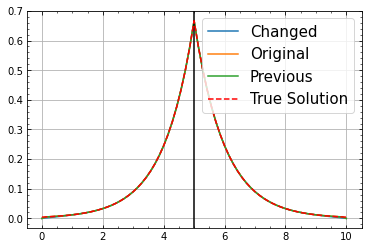

In [25]:
numiter = 1
phi = mc_1d_diff(phi, S, rng, D, sig, dx, numiter)

plt.plot(x, phi, label='Changed')
plt.plot(x, phi0, label='Original')
plt.plot(x, phip, label='Previous')
del phip
phip = phi.copy()
plot_source(S, x)
plt.plot(x, true1d(x,sin,b,D,sig), 'r--', label='True Solution')
plt.legend(loc='upper right')
plt.grid()
print('Minimize:', calc_cont_eqn_1d(phi=phi, S=S, D=D, sig=sig, dx=dx))
#playsound('bell.mp3')

We plugged in the analytic solution to check and see if the algorithm would converge to the right solution or diverge immediately. Luckily, as can be seen above, the algorithm converges to the right solution and does not make any changes to the solution we fed it. This makes sense since it should not have to change the correct solution. This solution is the 1 source term solution which has an analytic form as calculated earlier in the document. We implemented the two boundary conditions to be like sinks where the function must go to 0. We assumed that a distance of 5 would be far enough away from 0 for an exponential decay to go to 0. However to be more precise, we could extend the x axis and have to solution be more correct.

In [7]:
del phi

J = 10 # scale of phi
numpoints = 71
D = 1
sig = 1

sin = J//2

b = sig/(1+(1/(2*np.sqrt(sig/D))))
x = np.linspace(0, J, numpoints)
dx = x[1] - x[0]
phi = np.ones_like(x)*b
#(true1d(x,sin,b,D,sig) + np.sin(np.pi*x/J)) / max(true1d(x,sin,b,D,sig) + np.sin(np.pi*x/J)) * max(true1d(x,sin,b,D,sig))
phi[0] = 0
phi[-1] = 0
S = np.zeros_like(phi)
S[(numpoints-1)//2] = b

phi[np.where(S!=0)] = S[np.where(S!=0)]
phi0 = phi.copy()
phip = phi.copy()

Minimize: 9.447968758619345


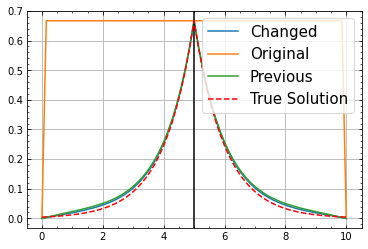

In [12]:
numiter = 1
phi = mc_1d_diff(phi, S, rng, D, sig, dx, numiter)

plt.plot(x, phi, label='Changed')
plt.plot(x, phi0, label='Original')
plt.plot(x, phip, label='Previous')
del phip
phip = phi.copy()
plot_source(S, x)
plt.plot(x, true1d(x,sin,b,D,sig), 'r--', label='True Solution')
plt.legend(loc='upper right')
plt.grid()
print('Minimize:', calc_cont_eqn_1d(phi=phi, S=S, D=D, sig=sig, dx=dx))
#playsound('bell.mp3')

Here, fed the algorithm a constant input besides for the boundary conditions. As can be seen from the plot, it converges quite nicely :) The reason why it isn't perfect is because this algorithm is time limited instead of being limited by processing power. Note, we ran this about 200,000 times to get a decent error of less than 3%. This is the exact reason why someone would use a Monte Carlo approach over a different approach. Our problem was not hard enough to require a Monte Carlo approach. An easier way to solve this would be using a different discretization method and some matrices, but this demonstrates the limitations. Like before, we assumed that the function must go to 0 at the boundaries like 2 sinks surrounding the source term. A part of the reason why the function is converging so slowly is due to this very large slope we created on the edges of the plot. A better guess such as a linear triangle with a peak at the center would most likely converge even faster than this one since it would already have the slope on the edges halfway closer to the correct value than all of the iterations currently required to get there via this method. 

Not pictured here, one interesting limitation of our algorithm that we explored is the fact that the algorithm does not like to change the maximum or minimum value of the source terms. We have started our algorithm with the correct height for the distribution since this is just a factor of normalization. If we ran this same algorithm with an initial guess with a different maximum height, we would find the exact solution, except just off by a multiplicative constant. We implemented the algorithm specifically so that it would not be able to change this maximum value after it has been previously set to not allow the algorithm to try and diverge. If this algorithm were used for real data gathering, the entire distribution could be normalized by integrating over all the possible x values. This is because the number of particles trapped in the system must be a constant since we are not removing or adding particles to the system. Thus, if we put 150 particles in, we can renormalize the final distribution to have an area of 150 by multiplying by the leftover residual.

# 2 sources

In [13]:
del phi

J = 10 # scale of phi
numpoints = 71
D = 1
sig = 1

sin = J//2

b = sig/(1+(1/(2*np.sqrt(sig/D))))
x = np.linspace(0, J, numpoints)
dx = x[1] - x[0]
phi = np.ones_like(x)*b
#(true1d(x,sin,b,D,sig) + np.sin(np.pi*x/J)) / max(true1d(x,sin,b,D,sig) + np.sin(np.pi*x/J)) * max(true1d(x,sin,b,D,sig))
phi[0] = 0
phi[-1] = 0
S = np.zeros_like(phi)
S[(numpoints-1)//3] = b
S[2*(numpoints-1)//3] = b/2

phi[np.where(S!=0)] = S[np.where(S!=0)]
phi0 = phi.copy()
phip = phi.copy()

Minimize: 12.668413288491152


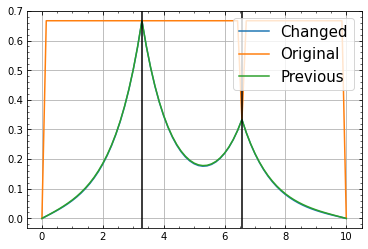

In [15]:
numiter = 1
phi = mc_1d_diff(phi, S, rng, D, sig, dx, numiter)

plt.plot(x, phi, label='Changed')
plt.plot(x, phi0, label='Original')

plt.plot(x, phip, label='Previous')
del phip
phip = phi.copy()

plot_source(S, x)
#plt.plot(x, true1d(x,sin,b,D,sig), label='True Solution')
plt.legend(loc='upper right')
plt.grid()
print('Minimize:', calc_cont_eqn_1d(phi=phi, S=S, D=D, sig=sig, dx=dx))
#playsound('bell.mp3')

Here, we explored out original interesting question. The question of what happens when there are multiple source terms inside of the nuclear reactor. As can be seen from the plot above, indeed our algorithm appears to have converged to a decent solution. This one was ran for about the same number of iterations as the previous. Like before, the largest error occurred with the largest changes of slope. Thus, we would expect to have the largest deviations near $x=9.5$ and near $x=1$ since those have the most concavity. We would expect that the U shaped part in the middle would also have errors, but smaller errors than the edges since all the values had to change less from the maximum of 0.7 everywhere. 

There were two different source heights used here to test our algorithm and to make sure the solution is not symmetric. Physically if this were to happen (it wouldn't realistically happen since this is only 1D) we would find more particles around the stronger source term and less particles around the smaller source term. This makes intuitive sense since the stronger source term will emit more particles than the weaker source term and thus have a greater contribution to the solution to the differential equation.

## Expected Outputs

After running our algorithm, we expect to get a plot of the distribution of values.  We may only stay in 1D since we feel it will take this algorithm a long time to converge in 2D with a squared amount of points.  Regardless, if we stay in 1D or 2D, we will implement multiple delta function source terms and see their effect on the solution.  To do this we will have to generalize the minimization function to allow us to easily implement multiple delta function spikes and avoid the discontinuities in the second derivative term.  We will also output for our known solutions the relative errors to see how our numeric solutions compare to the analytic solutions before applying our interesting test cases. We will also need to re-normalize the end product to both speed up convergence and ensure our result is physically meaningful. 

In [16]:
del phi

J = 10 # scale of phi
numpoints = 71
D = 1
sig = 1

sin = J//2

b = sig/(1+(1/(2*np.sqrt(sig/D))))
x = np.linspace(0, J, numpoints)
dx = x[1] - x[0]
phi = np.ones_like(x)*b
#(true1d(x,sin,b,D,sig) + np.sin(np.pi*x/J)) / max(true1d(x,sin,b,D,sig) + np.sin(np.pi*x/J)) * max(true1d(x,sin,b,D,sig))
phi[0] = 0
phi[-1] = 0
S = np.zeros_like(phi)
S[(numpoints-1)//2] = b
S[2*(numpoints-1)//3] = -b/2

phi[np.where(S!=0)] = S[np.where(S!=0)]
phi[np.where(S<0)] = 0
phi0 = phi.copy()
phip = phi.copy()

Minimize: 11.510162238587908


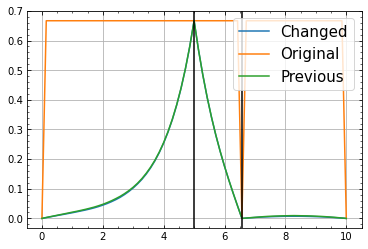

In [23]:
numiter = 1
phi = mc_1d_diff(phi, S, rng, D, sig, dx, numiter)

plt.plot(x, phi, label='Changed')
plt.plot(x, phi0, label='Original')
plt.plot(x, phip, label='Previous')
del phip
phip = phi.copy()
plot_source(S, x)
#plt.plot(x, true1d(x,sin,b,D,sig), label='True Solution')
plt.legend(loc='upper right')
plt.grid()
print('Minimize:', calc_cont_eqn_1d(phi=phi, S=S, D=D, sig=sig, dx=dx))
#playsound('bell.mp3')

We successfully implemented a sink term! Now in 1D, we realized this was not very useful since the boundary conditions act like sinks, but if this algorithm were expanded to 2D, we would likely see an interesting result. Regardless, we would have expected that the distribution would go to 0 with enough time between the right most and center sinks. This is because there is no particle flow from the source to the location between the two sinks... unless the particle could dodge both sinks. Physically, it might be possible for a particles together right in between the two sinks with 0 velocity so they are no longer moving. However, we expect that this model would not support that and expect the distributions to go to 0.

We realized that a sink is essentially just moving a boundary condition in closer to the correct answer. Thus, this case does not really show any new behavior. However, it does show similar to the previous test case that our algorithm works for sources that are off center form the main axis and are not symmetric about the source location.

## Conclusion

We conclude that Monte Carlo methods are in fact extremely slow when compared to the other methods of solving differential equations that we learned in class. The same problem given to a traditional BVP solution method would probably converge much faster if we were solving using a linear system of equations. However, that would be assuming that the BVP solver has a good initial guess. This algorithm will converge relatively quickly given a horrible initial guess like we implemented many times in this document. The traditional BVP matrix solution method also falls short when you are trying to setup and solve a very large system of equations in more than 1D. This method bypasses this completely. Although we would have liked to try and get this algorithm to run in 2D, we acknowledge that it would have run much too slowly. If we were given more time and did not have to rush to also complete the final project, we would have liked to investigate more of the interesting problems we mentioned in Phase 2.